In [197]:
%matplotlib notebook
# https://stackoverflow.com/questions/43599018/is-there-a-way-to-get-matplotlib-path-contains-points-to-be-inclusive-of-boundar
#I do quite like this command in Jupiter notebook:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
#It makes things wider and not waste the space on your screen
import pandas as pd
import importlib
import csv,os
import numpy as np
import pandas as pd
import itertools
import pyproj
import shapely
import copy
from uafgi import gicollections,cfutil,glacier,gdalutil,shputil
import uafgi.data.ns642
import netCDF4
import matplotlib.pyplot as plt
import uafgi.data.wkt
import uafgi.data.w21 as d_w21
map_wkt = uafgi.data.wkt.nsidc_ps_north
pd.set_option("display.max_rows", 20, "display.max_columns", None)

In [231]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [67]:
importlib.reload(d_w21)
w21 = uafgi.data.w21.read(map_wkt)
w21.df.sort_values('w21_glacier_number')[['w21_popular_name', 'w21_coast', 'w21_glacier_number', 'w21_data_fname']]

/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/pandas/core/series.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,w21_popular_name,w21_coast,w21_glacier_number,w21_data_fname
0,Inngia Isbrae,CW,1,Inngia Data.nc
1,Umiammakku Isbrae,CW,2,Ummiammakku Data.nc
2,Rink Isbrae,CW,3,Rink Isbrae Data.nc
3,Kangerlussuup Se.,CW,4,Kangerlussuup Data.nc
4,Kangerluarsuup Se.,CW,5,Kangerluarsuup Data.nc
5,Perlerfiup Se.,CW,6,Perlerfiup Data.nc
6,Sermeq Silarleq,CW,7,Sermeq Silarleq Data.nc
7,Kangilleq,CW,8,Kangilleq Data.nc
8,Sermilik,CW,9,Sermilik Data.nc
9,Lille Gl.,CW,10,Lille Data.nc


In [163]:
row = w21.df[w21.df['w21_popular_name']=='Jakobshavn Isbrae'].iloc[0].to_dict()
data_fname = row['w21_data_fname']
row

{'w21_popular_name': 'Jakobshavn Isbrae',
 'w21_greenlandic_name': 'Sermeq Kujalleq',
 'w21_coast': 'CW',
 'w21_category': 'FE',
 'w21_Qr': 8.95,
 'w21_Qf': 6.72,
 'w21_Qm': 4.98,
 'w21_Qs': 2.43,
 'w21_Qc_inferred': nan,
 'w21_qm': 1.37,
 'w21_qf': 6.86,
 'w21_qc': nan,
 'w21_mean_depth': 533.0,
 'w21_min_depth': 401.0,
 'w21_quality_str': 'Moderate',
 'w21_area_grounded_1992_2017': 90.24,
 'w21_area_grounded_1992_1997': 10.96,
 'w21_area_grounded_1998_2007': 42.72,
 'w21_area_grounded_2008_2017': 36.56,
 'w21_mean_fjord_width': 10.08,
 'w21_length_grounded_1992_2017': 8.95,
 'w21_length_grounded_1992_1997': 1.09,
 'w21_length_grounded_1998_2007': 4.24,
 'w21_length_grounded_2008_2017': 3.63,
 'w21_ocean_model_sample_area': 'CW2',
 'w21_mean_TF_1992-2017': 5.18,
 'w21_mean_TF_1992-1997': 3.62,
 'w21_mean_TF_1998-2007': 5.19,
 'w21_mean_TF_2008-2017': 6.05,
 'w21_subglacial_discharge_1992_2017': 22.83,
 'w21_subglacial_discharge_1992_1997': 15.8,
 'w21_subglacial_discharge_1998_2007': 

In [202]:
importlib.reload(shputil)
from uafgi import pdutil
importlib.reload(pdutil)
terms=shputil.read_df('velocities_data/wood2021/Greenland_Glacier_Ice_Front_Positions.shp', read_shapes=True, wkt=map_wkt)
terms.df['loc']

0       LINESTRING (-259155 -1941830, -259147 -1941820...
1       LINESTRING (-263302 -1948350, -263302 -1948280...
2       LINESTRING (-264009 -1945300, -264009 -1945310...
3       LINESTRING (-255747 -1942400, -255761 -1942380...
4       LINESTRING (-264031 -1945260, -264031 -1945280...
                              ...                        
6445    LINESTRING (-302638.850168814 -1853738.9960646...
6446    LINESTRING (-307346.194460371 -1851815.6366210...
6447    LINESTRING (-302071.267970121 -1854304.5691209...
6448    LINESTRING (-305045 -1853340, -305018 -1853330...
6449    LINESTRING (-302285.055199951 -1854077.0702447...
Name: loc, Length: 6450, dtype: object

In [224]:
w21t = d_w21.read_termini(map_wkt)
w21t.df

,w21t_Glacier,w21t_Year,w21t_Day_of_Yea,w21t_Month,w21t_Day,w21t_terminus,w21t_key
0,Inngia,2016,193,7,11,"LINESTRING (-259155 -1941830, -259147 -1941820...","(Inngia, 2016, 193)"
1,Inngia,1985,132,5,12,"LINESTRING (-263302 -1948350, -263302 -1948280...","(Inngia, 1985, 132)"
2,Inngia,1999,298,10,25,"LINESTRING (-264009 -1945300, -264009 -1945310...","(Inngia, 1999, 298)"
3,Inngia,2018,200,7,19,"LINESTRING (-255747 -1942400, -255761 -1942380...","(Inngia, 2018, 200)"
4,Inngia,2001,191,7,10,"LINESTRING (-264031 -1945260, -264031 -1945280...","(Inngia, 2001, 191)"
...,...,...,...,...,...,...,...
6445,Upernavik Isstrom SS,2006,219,8,7,LINESTRING (-302638.850168814 -1853738.9960646...,"(Upernavik Isstrom SS, 2006, 219)"
6446,Upernavik Isstrom SS,1985,98,4,8,LINESTRING (-307346.194460371 -1851815.6366210...,"(Upernavik Isstrom SS, 1985, 98)"
6447,Upernavik Isstrom SS,2015,213,8,1,LINESTRING (-302071.267970121 -1854304.5691209...,"(Upernavik Isstrom SS, 2015, 213)"
6448,Upernavik Isstrom SS,1995,117,4,27,"LINESTRING (-305045 -1853340, -305018 -1853330...","(Upernavik Isstrom SS, 1995, 117)"


In [228]:
importlib.reload(d_w21)

w21tp = d_w21.termini_by_glacier(w21t)
w21tp

ExtDf(w21t_)

In [229]:
w21tp.df

,w21t_Glacier,w21t_points,w21t_key
0,79 North,"(POINT (491263 -1039930), POINT (491268 -10398...",79 North
1,AP Bernstorff,"(POINT (167163 -2883290), POINT (167203 -28832...",AP Bernstorff
2,Academy,"(POINT (195411 -887569), POINT (195431 -887490...",Academy
3,Adams,"(POINT (70870.60000000001 -838393), POINT (709...",Adams
4,Akullersuup,"(POINT (-227024 -2817320), POINT (-227024 -281...",Akullersuup
...,...,...,...
221,Vestfjord,"(POINT (589003 -2063720), POINT (588964 -20637...",Vestfjord
222,Waltershausen,"(POINT (622067 -1653420), POINT (622101 -16534...",Waltershausen
223,Yngvar Nielsen,"(POINT (-487896 -1403610), POINT (-487878 -140...",Yngvar Nielsen
224,Yngvar Nielsen W,"(POINT (-492609 -1400770), POINT (-492598 -140...",Yngvar Nielsen W


In [209]:
import uafgi.data
import pickle
#select = pd.read_pickle(uafgi.data.join_outputs('stability', '01_select.df'))
with open(uafgi.data.join_outputs('stability', '01_select.dfx'), 'rb') as fin:
    select = pickle.load(fin)
select.df.columns

Index(['w21_popular_name', 'w21_greenlandic_name', 'w21_coast', 'w21_category',
       'w21_Qr', 'w21_Qf', 'w21_Qm', 'w21_Qs', 'w21_Qc_inferred', 'w21_qm',
       'w21_qf', 'w21_qc', 'w21_mean_depth', 'w21_min_depth',
       'w21_quality_str', 'w21_area_grounded_1992_2017',
       'w21_area_grounded_1992_1997', 'w21_area_grounded_1998_2007',
       'w21_area_grounded_2008_2017', 'w21_mean_fjord_width',
       'w21_length_grounded_1992_2017', 'w21_length_grounded_1992_1997',
       'w21_length_grounded_1998_2007', 'w21_length_grounded_2008_2017',
       'w21_ocean_model_sample_area', 'w21_mean_TF_1992-2017',
       'w21_mean_TF_1992-1997', 'w21_mean_TF_1998-2007',
       'w21_mean_TF_2008-2017', 'w21_subglacial_discharge_1992_2017',
       'w21_subglacial_discharge_1992_1997',
       'w21_subglacial_discharge_1998_2007',
       'w21_subglacial_discharge_2008_2017', 'w21_mean_xsection_area',
       'w21_mean_undercutting_1992_2017', 'w21_mean_undercutting_1992_1997',
       'w21_mean_und

In [272]:
select.df

,w21_popular_name,w21_greenlandic_name,w21_coast,w21_category,w21_Qr,w21_Qf,w21_Qm,w21_Qs,w21_Qc_inferred,w21_qm,w21_qf,w21_qc,w21_mean_depth,w21_min_depth,w21_quality_str,w21_area_grounded_1992_2017,w21_area_grounded_1992_1997,w21_area_grounded_1998_2007,w21_area_grounded_2008_2017,w21_mean_fjord_width,w21_length_grounded_1992_2017,w21_length_grounded_1992_1997,w21_length_grounded_1998_2007,w21_length_grounded_2008_2017,w21_ocean_model_sample_area,w21_mean_TF_1992-2017,w21_mean_TF_1992-1997,w21_mean_TF_1998-2007,w21_mean_TF_2008-2017,w21_subglacial_discharge_1992_2017,w21_subglacial_discharge_1992_1997,w21_subglacial_discharge_1998_2007,w21_subglacial_discharge_2008_2017,w21_mean_xsection_area,w21_mean_undercutting_1992_2017,w21_mean_undercutting_1992_1997,w21_mean_undercutting_1998_2007,w21_mean_undercutting_2008_2017,w21_mean_undercutting_uncertainty,w21_flux_basin_mouginot_2019,w21_mean_discharge,w21_mean_mass_balance,w21_reference_smb_1961_1990,w21_glacier_number,w21_data_fname,w21_key,w21_allnames,include,bkm15_key,bkm15_id,bkm15_new_greenl_name,bkm15_old_greenl_name,bkm15_foreign_name,bkm15_official_name,bkm15_alt,bkm15_allnames,lat,lon,loc,fj_poly,fj_fid,ns481_key,ns481_grid,ns481_poly,cf20_key,cf20_glacier_id,cf20_greenlandic_name,cf20_official_name,cf20_alt_name,cf20_ref_name,cf20_fname,cf20_uniqename,cf20_locs,cf20_allnames,ns642_key,ns642_GlacierID,ns642_points,up_key,up_fid,up_id,up_loc
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,F. Graae Gl.,,CE,DW,1.67,4.03,3.58,0.00,2.12,0.02,2.64,2.62,276.0,118.0,Poor,3.88,-0.21,3.38,0.71,2.32,1.67,-0.09,1.45,0.30,CE5,1.41,-0.12,0.89,2.79,0.91,0.62,0.91,1.06,0.77,0.38,0.02,0.23,0.73,25.60,F_GRAAE,1.00,-0.1,1.0,128,F Graae Data.nc,"(F. Graae Gl., F_GRAAE)","(F. Graae Gl., )",NaN,GGN0394,GGN0394,NaN,NaN,F. Graae Gletsjer,F. Graae Gletsjer,NaN,"(F. Graae Gletsjer, nan, nan, F. Graae Gletsje...",72.083300,-28.233300,POINT (564315.6860823556 -1873037.319925007),POLYGON ((553232.1652885491 -1884096.042851279...,19.0,E71.75N,E71.75N,"POLYGON ((489950 -1962150, 581050 -1962150, 58...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.0,118,"(POINT (549765.6446273515 -1874639.261997728),...",0,0,None,POINT (546206.5823260495 -1872217.376889129)
4,Perlerfiup Se.,Perlerfiup Sermia,CW,DW,3.38,0.91,1.53,0.00,2.76,0.46,0.99,0.53,139.0,120.0,Moderate,9.22,0.08,1.98,7.17,2.73,3.38,0.03,0.72,2.63,CW1,2.89,2.26,2.95,3.16,0.62,0.42,0.58,0.77,0.49,0.62,0.45,0.63,0.70,28.32,SERMEQ_SILARLEQ,2.80,-1.0,1.9,6,Perlerfiup Data.nc,"(Perlerfiup Se., SERMEQ_SILARLEQ)","(Perlerfiup Se., Perlerfiup Sermia)",NaN,GGN0303,GGN0303,Perlerfiup Sermia,Perdlerfiup Sermia,NaN,Perlerfiup Sermia,NaN,"(Perlerfiup Sermia, Perlerfiup Sermia, Perdler...",70.990900,-50.922700,POINT (-214374.3459893014 -2066450.273916265),POLYGON ((-216830.321290521 -2063046.486024775...,8.0,W70.90N,W70.90N,"POLYGON ((-227050 -2102850, -182050 -2102850, ...",Perlerfiup Sermia,14.0,Perlerfiup Sermia,Perlerfiup Sermia,Perdlerfiup Sermia,Perlerfiup Sermia,/Users/eafischer2/data_sets/velocities_data/ca...,Perlerfiup Sermia,(POINT (-215742.5480316377 -2066340.555133571)...,"(Perlerfiup Sermia, Perlerfiup Sermia, Perdler...",14.0,14,(POINT (-214983.8014421279 -2064816.580707718)...,14,14,None,POINT (-212388.8772227576 -2067498.956061578)
5,Sermeq Avannarleq,Sermeq Avannarleq,CW,NC,3.32,1.95,NaN,0.00,NaN,NaN,0.61,NaN,41.0,0.0,Poor,10.50,0.00,4.27,6.23,3.16,3.32,0.00,1.35,1.97,CW2,3.07,3.63,3.59,2.16,3.98,3.05,3.91,4.54,0.13,0.68,0.82,0.80,0.48,78.07,SERMEQ_AVANNARLEQ,0.40,-0.5,0.2,16,Sermeq Avannarleq (near JI) Data.nc,"(Sermeq Avannarleq, SERMEQ_AVANNARLEQ)","(Sermeq Avannarleq, Sermeq Avannarleq)",NaN,GGN0265,GGN0265,Sermeq Avannarleq,Sermeq Avangnardleq,NaN,Sermeq Avannarleq,NaN,"(Sermeq Avannarleq, Sermeq Avannarleq, Sermeq ...",70.085300,-50.246800,POINT (-199207.1243908704 -2169285.139298873),POLYGON ((-198454.3335436573 -2174687.95710681...,31.0,W69.95N,W69.95N,"POLYGON ((-218150 -2218150, -163150 -2218

In [282]:
importlib.reload(pdutil)
match = pdutil.match_point_poly(w21tp, 'w21t_points', select, 'fj_poly').swap()
match.df

,w21t_ix,w21_ix,w21t_key,w21_key
0,47,1,F Graae,"(F. Graae Gl., F_GRAAE)"
1,160,4,Perlerfiup,"(Perlerfiup Se., SERMEQ_SILARLEQ)"
2,185,5,Sermeq Avannarleq,"(Sermeq Avannarleq, SERMEQ_AVANNARLEQ)"
3,101,6,Kangilleq,"(Kangilleq, CW_NONAME2)"
4,48,10,Farquhar,"(Farquhar Gl., FARQUHAR_GLETSCHER)"
5,217,13,Ussing Braeer,"(Ussing Br., USSING_BRAEER)"
6,114,14,Kong Oscar,"(Kong Oscar Gl., KONG_OSCAR_GLETSCHER)"
7,134,15,Morell,"(Morell Gl., GADE-MORELL)"
8,135,15,Morell W,"(Morell Gl., GADE-MORELL)"
9,151,16,Nordenskiold,"(Nordenskiold Gl. N, NORDENSKIOLD_GLESCHER_NW)"


In [275]:
overrides

,w21_key,include,cf20_key,bkm15_key,lat,lon,ns481_key,ns642_key,w21t_key,loc
0,"(Rink Isbrae, RINK_ISBRAE)",1.0,None,GGN0347,NaN,NaN,None,NaN,None,NaN
1,"(Store Gl., STORE_GLETSCHER)",1.0,None,GGN0279,NaN,NaN,None,NaN,None,NaN
2,"(Jakobshavn Isbrae, JAKOBSHAVN_ISBRAE)",1.0,None,GGN0235,NaN,NaN,None,3.0,None,NaN
3,"(Helheim Gl., HELHEIMGLETSCHER)",1.0,None,GGN0163,NaN,NaN,None,NaN,None,NaN
4,"(Skinfaxe Gl., SKINFAXE)",1.0,None,GGN0059,NaN,NaN,None,NaN,None,NaN
5,"(Kangerlussuaq Gl., KANGERLUSSUAQ)",1.0,Kangerlussuaq Gletsjer,GGN0218,NaN,NaN,None,153.0,None,NaN
6,"(Upernavik Isstrom N, UPERNAVIK_ISSTROM_N)",1.0,None,None,73.057998,-54.220896,None,NaN,None,POINT (-296162.7984253188 -1824348.37660353)
7,"(Upernavik Isstrom C, UPERNAVIK_ISSTROM_C)",1.0,None,None,72.938173,-54.267907,None,NaN,None,POINT (-299794.8973538086 -1837190.44067212)
8,"(Upernavik Isstrom S, UPERNAVIK_ISSTROM_S)",1.0,None,GGN0452,72.850384,-54.364251,None,21.0,None,POINT (-304464.7388332954 -1846270.687993343)
9,"(Upernavik Isstrom SS, UPERNAVIK_ISSTROM_SS)",NaN,None,None,NaN,NaN,None,20.0,None,NaN


In [288]:
from uafgi.data import stability
importlib.reload(stability)
importlib.reload(pdutil)
overrides = stability.read_overrides()
s2 = match.left_join(overrides=overrides)
s2.df.drop(['ns642_points', 'w21t_points'], inplace=True, axis=1)
s2.df
#overrides
#match.df

,w21_popular_name,w21_greenlandic_name,w21_coast,w21_category,w21_Qr,w21_Qf,w21_Qm,w21_Qs,w21_Qc_inferred,w21_qm,w21_qf,w21_qc,w21_mean_depth,w21_min_depth,w21_quality_str,w21_area_grounded_1992_2017,w21_area_grounded_1992_1997,w21_area_grounded_1998_2007,w21_area_grounded_2008_2017,w21_mean_fjord_width,w21_length_grounded_1992_2017,w21_length_grounded_1992_1997,w21_length_grounded_1998_2007,w21_length_grounded_2008_2017,w21_ocean_model_sample_area,w21_mean_TF_1992-2017,w21_mean_TF_1992-1997,w21_mean_TF_1998-2007,w21_mean_TF_2008-2017,w21_subglacial_discharge_1992_2017,w21_subglacial_discharge_1992_1997,w21_subglacial_discharge_1998_2007,w21_subglacial_discharge_2008_2017,w21_mean_xsection_area,w21_mean_undercutting_1992_2017,w21_mean_undercutting_1992_1997,w21_mean_undercutting_1998_2007,w21_mean_undercutting_2008_2017,w21_mean_undercutting_uncertainty,w21_flux_basin_mouginot_2019,w21_mean_discharge,w21_mean_mass_balance,w21_reference_smb_1961_1990,w21_glacier_number,w21_data_fname,w21_key,w21_allnames,include,bkm15_key,bkm15_id,bkm15_new_greenl_name,bkm15_old_greenl_name,bkm15_foreign_name,bkm15_official_name,bkm15_alt,bkm15_allnames,lat,lon,loc,fj_poly,fj_fid,ns481_key,ns481_grid,ns481_poly,cf20_key,cf20_glacier_id,cf20_greenlandic_name,cf20_official_name,cf20_alt_name,cf20_ref_name,cf20_fname,cf20_uniqename,cf20_locs,cf20_allnames,ns642_key,ns642_GlacierID,up_key,up_fid,up_id,up_loc,w21t_key,w21t_Glacier
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,F. Graae Gl.,,CE,DW,1.67,4.03,3.58,0.00,2.12,0.02,2.64,2.62,276.0,118.0,Poor,3.88,-0.21,3.38,0.71,2.32,1.67,-0.09,1.45,0.30,CE5,1.41,-0.12,0.89,2.79,0.91,0.62,0.91,1.06,0.77,0.38,0.02,0.23,0.73,25.60,F_GRAAE,1.00,-0.1,1.0,128,F Graae Data.nc,"(F. Graae Gl., F_GRAAE)","(F. Graae Gl., )",NaN,GGN0394,GGN0394,NaN,NaN,F. Graae Gletsjer,F. Graae Gletsjer,NaN,"(F. Graae Gletsjer, nan, nan, F. Graae Gletsje...",72.083300,-28.233300,POINT (564315.6860823556 -1873037.319925007),POLYGON ((553232.1652885491 -1884096.042851279...,19.0,E71.75N,E71.75N,"POLYGON ((489950 -1962150, 581050 -1962150, 58...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.0,118,0,0,None,POINT (546206.5823260495 -1872217.376889129),F Graae,F Graae
4,Perlerfiup Se.,Perlerfiup Sermia,CW,DW,3.38,0.91,1.53,0.00,2.76,0.46,0.99,0.53,139.0,120.0,Moderate,9.22,0.08,1.98,7.17,2.73,3.38,0.03,0.72,2.63,CW1,2.89,2.26,2.95,3.16,0.62,0.42,0.58,0.77,0.49,0.62,0.45,0.63,0.70,28.32,SERMEQ_SILARLEQ,2.80,-1.0,1.9,6,Perlerfiup Data.nc,"(Perlerfiup Se., SERMEQ_SILARLEQ)","(Perlerfiup Se., Perlerfiup Sermia)",NaN,GGN0303,GGN0303,Perlerfiup Sermia,Perdlerfiup Sermia,NaN,Perlerfiup Sermia,NaN,"(Perlerfiup Sermia, Perlerfiup Sermia, Perdler...",70.990900,-50.922700,POINT (-214374.3459893014 -2066450.273916265),POLYGON ((-216830.321290521 -2063046.486024775...,8.0,W70.90N,W70.90N,"POLYGON ((-227050 -2102850, -182050 -2102850, ...",Perlerfiup Sermia,14.0,Perlerfiup Sermia,Perlerfiup Sermia,Perdlerfiup Sermia,Perlerfiup Sermia,/Users/eafischer2/data_sets/velocities_data/ca...,Perlerfiup Sermia,(POINT (-215742.5480316377 -2066340.555133571)...,"(Perlerfiup Sermia, Perlerfiup Sermia, Perdler...",14.0,14,14,14,None,POINT (-212388.8772227576 -2067498.956061578),Perlerfiup,Perlerfiup
5,Sermeq Avannarleq,Sermeq Avannarleq,CW,NC,3.32,1.95,NaN,0.00,NaN,NaN,0.61,NaN,41.0,0.0,Poor,10.50,0.00,4.27,6.23,3.16,3.32,0.00,1.35,1.97,CW2,3.07,3.63,3.59,2.16,3.98,3.05,3.91,4.54,0.13,0.68,0.82,0.80,0.48,78.07,SERMEQ_AVANNARLEQ,0.40,-0.5,0.2,16,Sermeq Avannarleq (near JI) Data.nc,"(Sermeq Avannarleq, SERMEQ_AVANNARLEQ)","(Sermeq Avannarleq, Sermeq Avannarleq)",NaN,GGN0265,GGN0265,Sermeq Avannarleq,Sermeq Avangnardleq,NaN,Sermeq Avannarleq,NaN,"(Sermeq Avannarleq, Sermeq Avannarleq, Sermeq ...",70.085300,-50.246800,POINT (-199207.1243908704 -2169285.139298873),POLYGON ((-198454.3335436573 -2174687.95710681...,31.0,W69.95N,W69.95N,"POLYGON ((-218150 -2218150, -163150 -2218150, ...",Sermeq Avannarleq 70N,8.0,Sermeq Avannarleq,

In [234]:
w21.df['w21_key'].to_list()

[('Inngia Isbrae', 'INNGIA_ISBRAE'),
 ('Umiammakku Isbrae', 'UMIAMMAKKU_ISBRAE'),
 ('Rink Isbrae', 'RINK_ISBRAE'),
 ('Kangerlussuup Se.', 'KANGERLUSSUUP_SERMERSUA'),
 ('Kangerluarsuup Se.', 'KANGERLUARSUUP_SERMIA'),
 ('Perlerfiup Se.', 'SERMEQ_SILARLEQ'),
 ('Sermeq Silarleq', 'SERMEQ_SILARLEQ'),
 ('Kangilleq', 'CW_NONAME2'),
 ('Sermilik', 'LILLE_GLETSCHER'),
 ('Lille Gl.', 'LILLE_GLETSCHER'),
 ('Store Gl.', 'STORE_GLETSCHER'),
 ('Sermeq Avannarleq', 'SERMEQ_AVANNARLEQ2'),
 ('Sermeq Kujalleq', 'SERMEQ_KUJALLEQ'),
 ('Kangilernata Se.', 'KANGILERNGATA_SERMIA'),
 ('Eqip Se.', 'EQIP_SERMIA'),
 ('Sermeq Avannarleq', 'SERMEQ_AVANNARLEQ'),
 ('Jakobshavn Isbrae', 'JAKOBSHAVN_ISBRAE'),
 ('Alangorliup Se.', 'SAQQARLIUP_ALANGORLIUP'),
 ('Saqqarliup Se.', 'SAQQARLIUP_ALANGORLIUP'),
 ('Narsap Se.', 'NARSAP_SERMIA'),
 ('Akullersuup Se.', 'AKULLERSUUP-QAMANAARSUUP'),
 ('Kangiata Nunaata Se.', 'KANGIATA_NUNAATA_SERMIA'),
 ('Nakkaasorsuaq', 'FREDERIKSHABS-NAKKAASORSUAQ'),
 ('Avannarleq Br.', 'AVANNARLEQ

In [279]:
match.left_join(overrides).df

TypeError: left_join() takes 1 positional argument but 2 were given

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


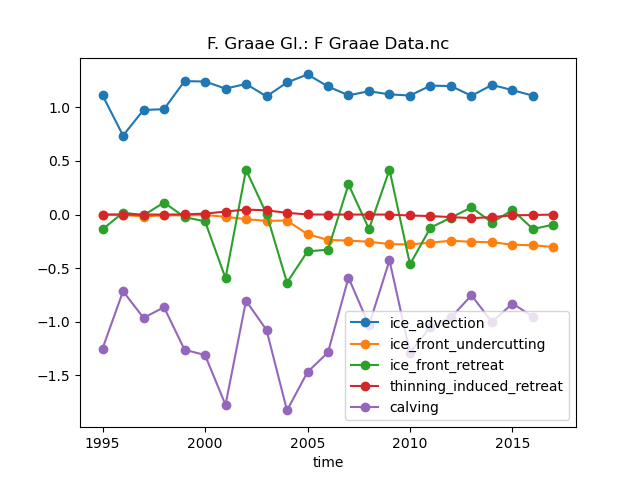

ice_advection rate value
ice_front_undercutting rate value
AA2  ice_advection
   aa2.1
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1


/Users/eafischer2/harn/pismip6/uafgi/uafgi/data/w21.py:406: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  values2 = np.array([scipy.integrate.quad(F, lt, ht) for lt,ht in zip(low_times2, high_times2)])


ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


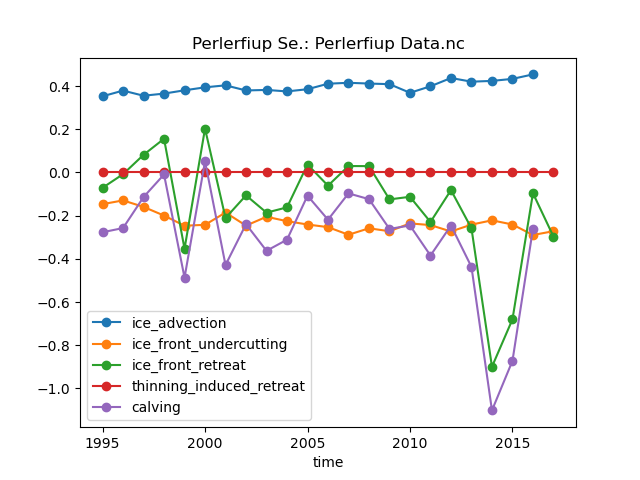

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


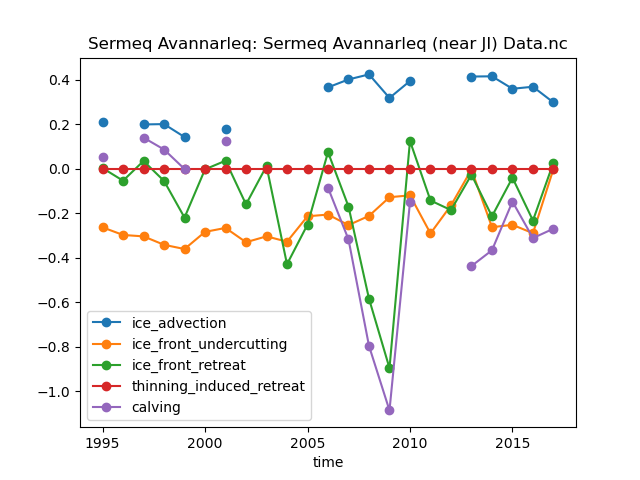

ice_advection rate value
ice_front_undercutting rate value
AA2  ice_advection
   aa2.1
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1


/Users/eafischer2/harn/pismip6/uafgi/uafgi/data/w21.py:406: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  values2 = np.array([scipy.integrate.quad(F, lt, ht) for lt,ht in zip(low_times2, high_times2)])


ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


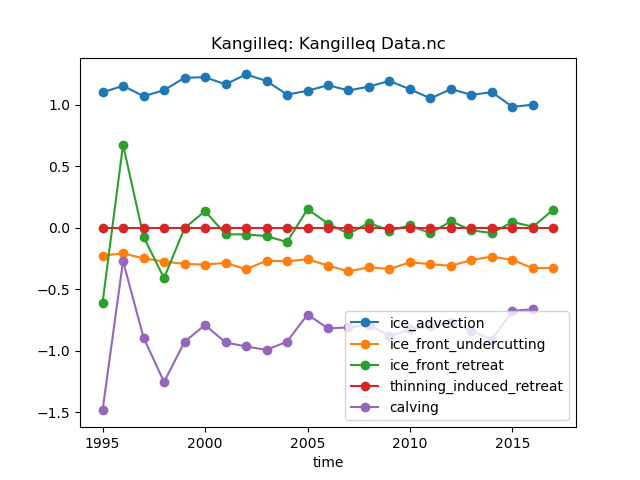

ice_advection rate value
ice_front_undercutting rate value
AA2  ice_advection
   aa2.1
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1


/Users/eafischer2/harn/pismip6/uafgi/uafgi/data/w21.py:406: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  values2 = np.array([scipy.integrate.quad(F, lt, ht) for lt,ht in zip(low_times2, high_times2)])


ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


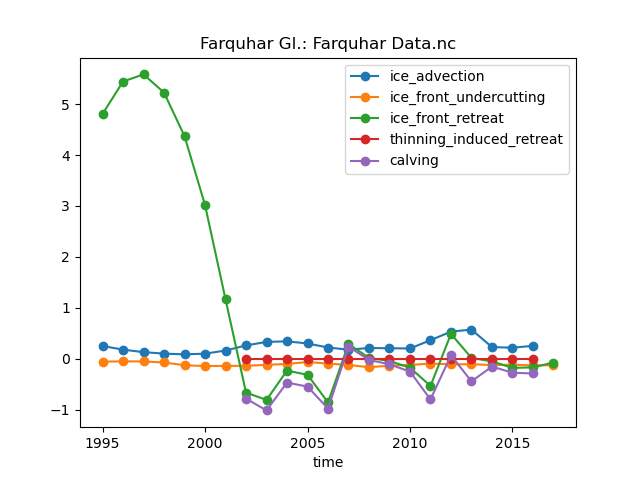

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


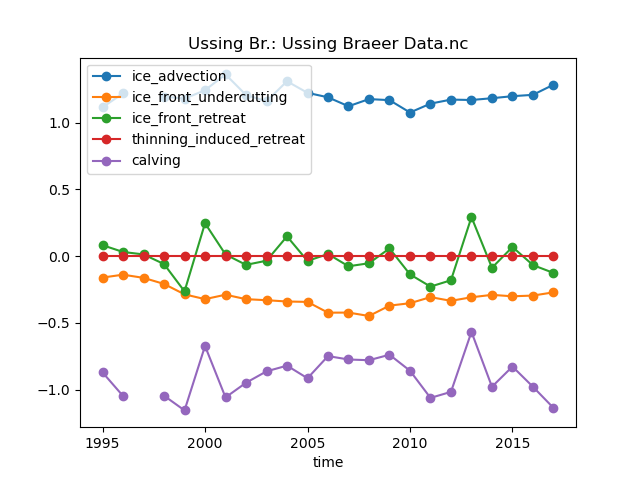

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


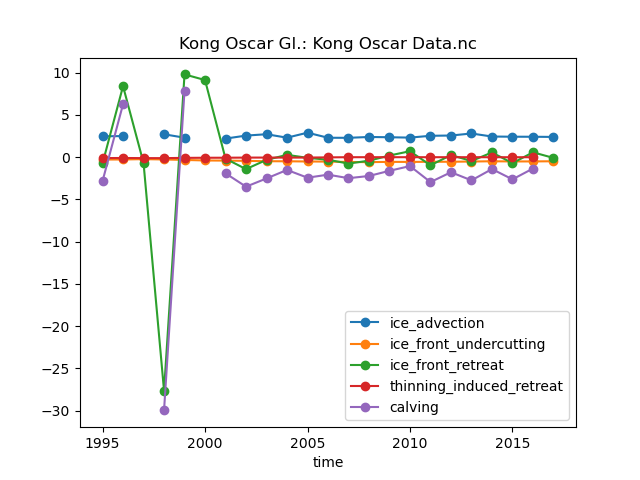

ice_advection rate value
ice_front_undercutting rate value
AA2  ice_advection
   aa2.1
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1


/Users/eafischer2/harn/pismip6/uafgi/uafgi/data/w21.py:406: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  values2 = np.array([scipy.integrate.quad(F, lt, ht) for lt,ht in zip(low_times2, high_times2)])


ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


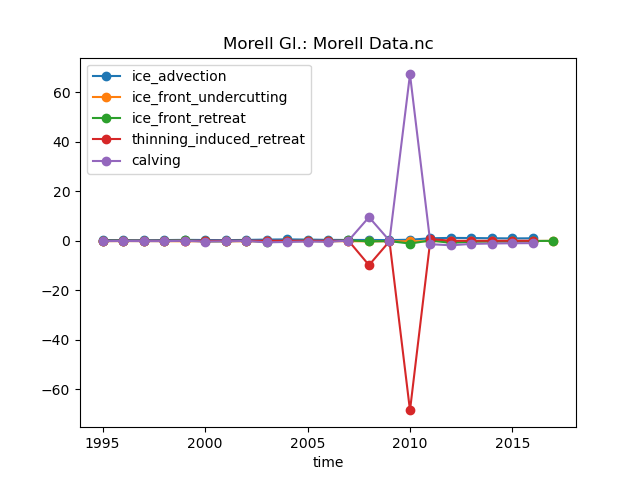

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


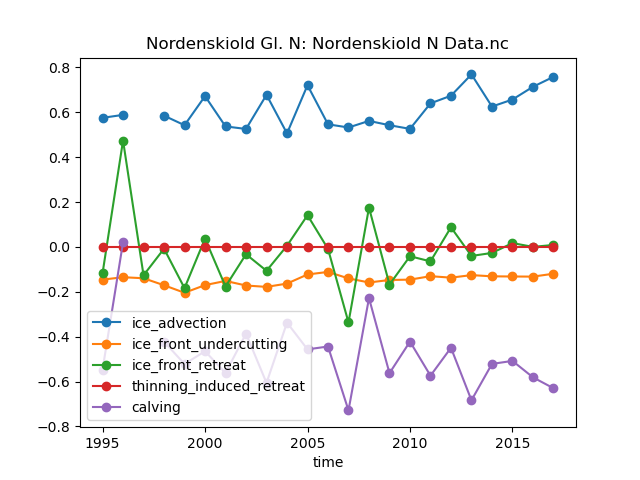

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


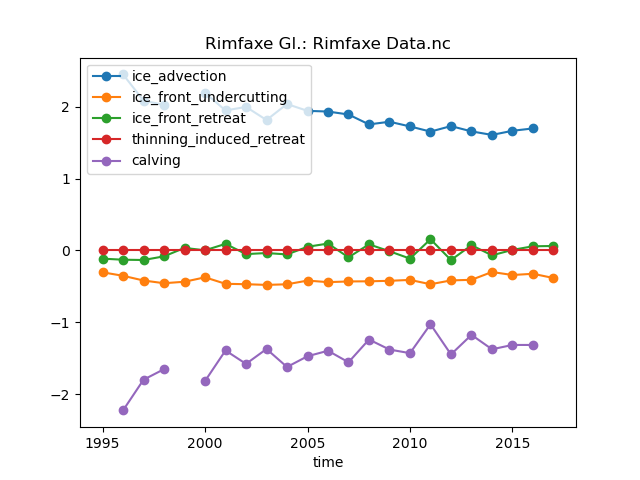

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


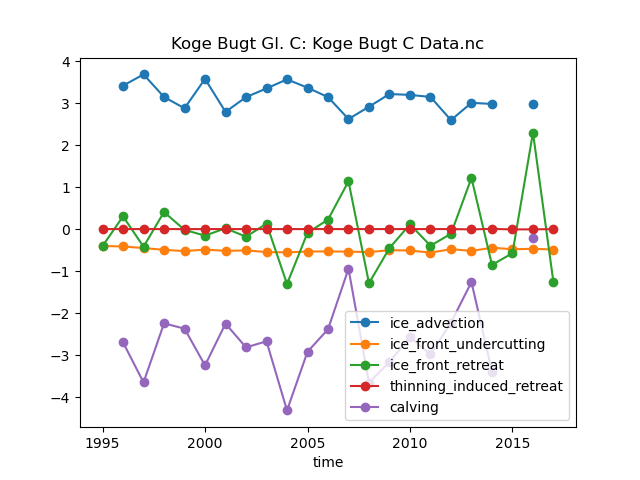

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


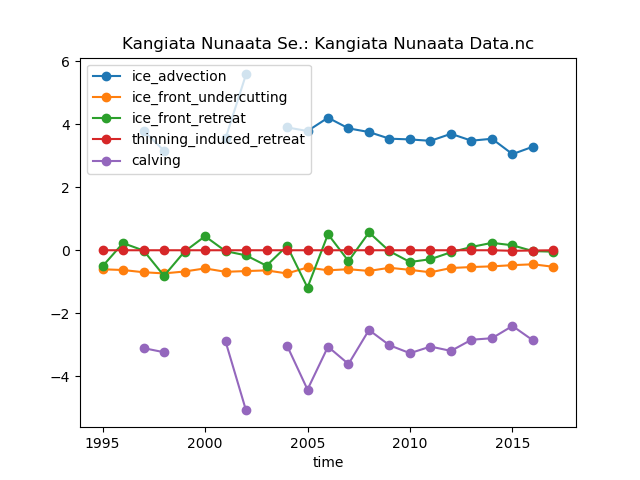

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


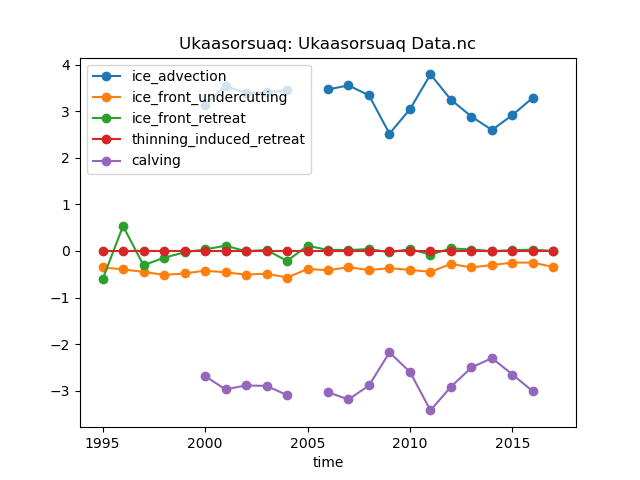

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


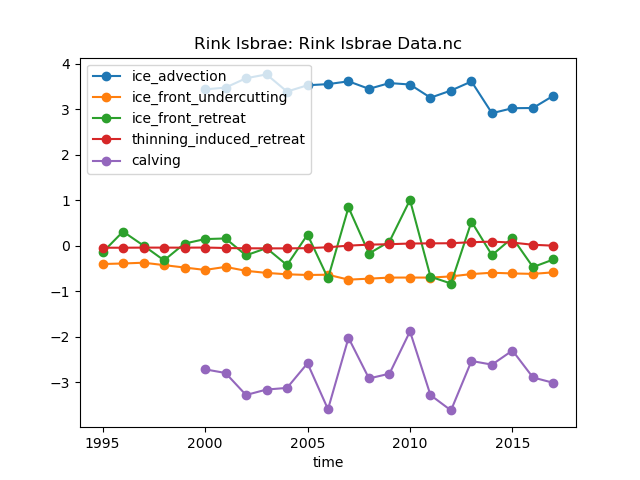

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


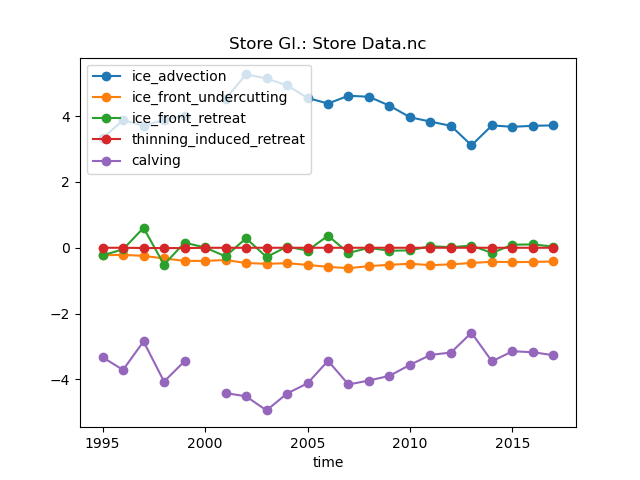

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


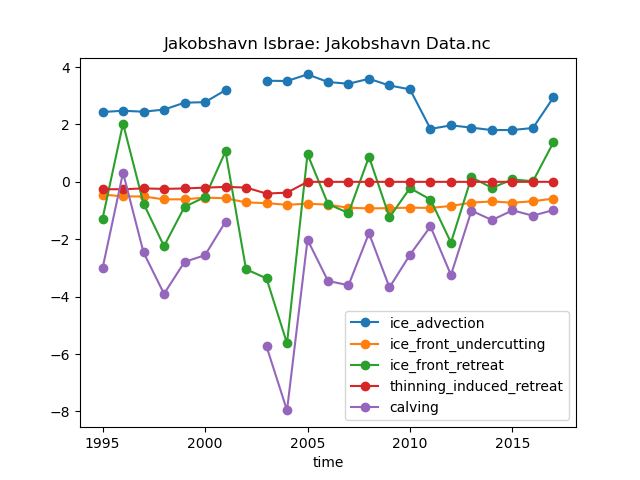

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


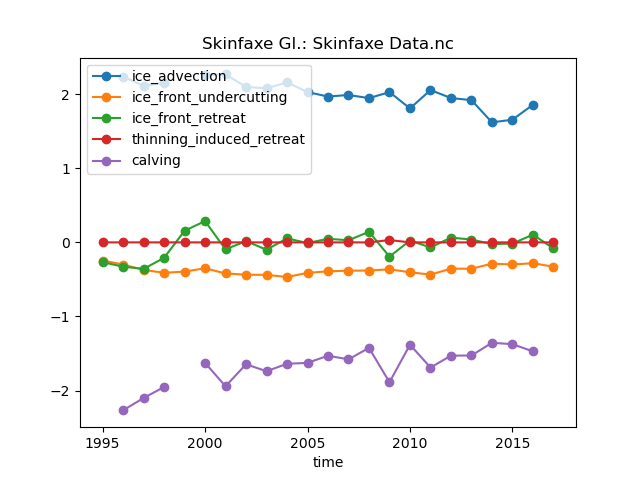

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


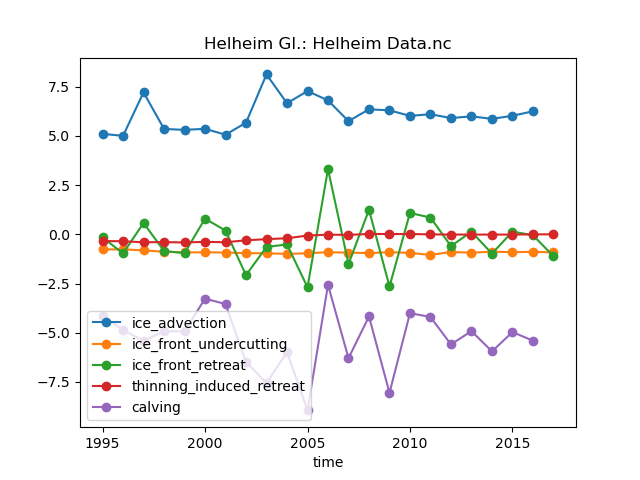

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


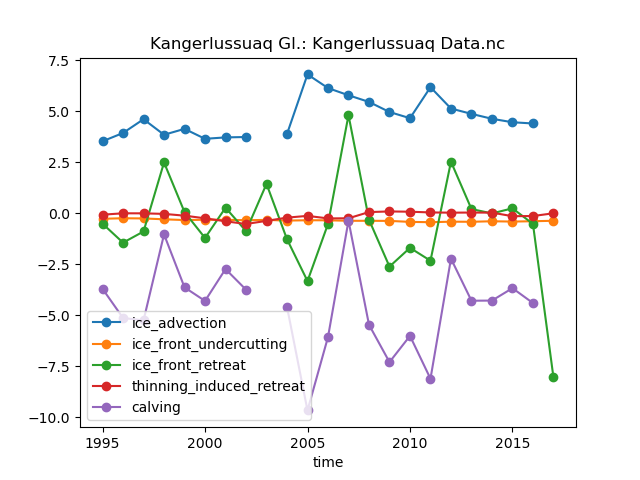

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


<IPython.core.display.Javascript object>


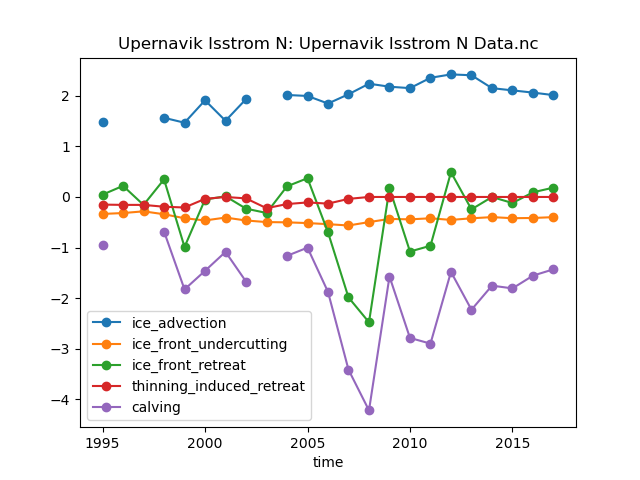

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<IPython.core.display.Javascript object>


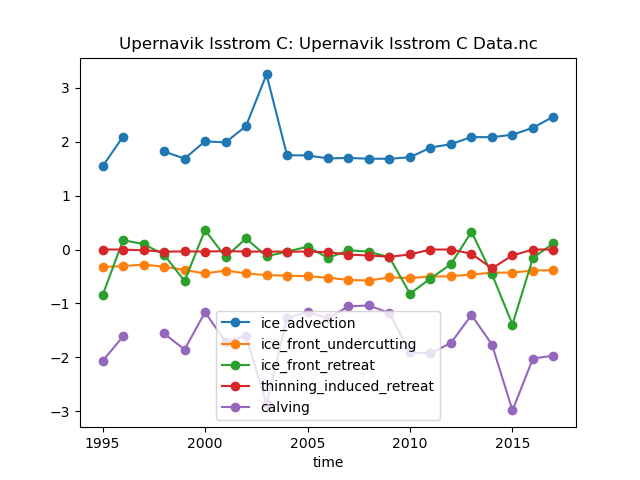

ice_advection rate value
ice_front_undercutting rate value
AA1  ice_advection
ice_advection (23,)
AA2  ice_front_undercutting
   aa2.1
ice_front_undercutting (23,)
AA2  ice_front_retreat
ice_front_retreat (23,)
AA2  thinning_induced_retreat
thinning_induced_retreat (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<IPython.core.display.Javascript object>


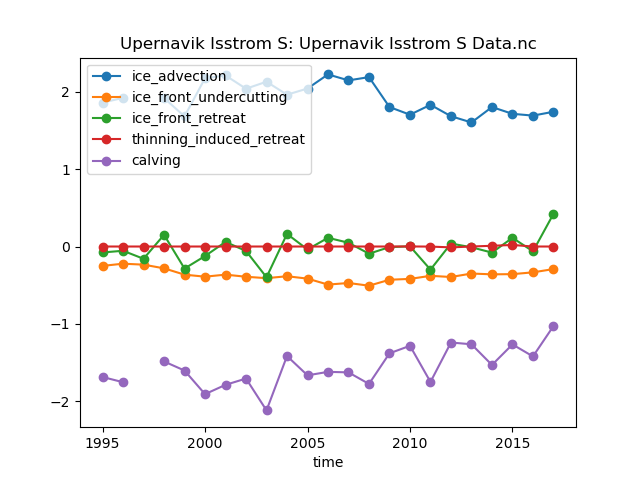

In [171]:
importlib.reload(d_w21)

select = pd.read_pickle(uafgi.data.join_outputs('stability', '03_select.df'))


for _,row in select.iterrows():
    data_fname = row['w21_data_fname']
        
    df = d_w21.glacier_rate_df(data_fname)

    df.plot(marker='o')
    plt.title(row['w21_popular_name'] + ': ' + data_fname)
    
plt.show()

In [161]:
#data_fname = 'Jakobshavn Data.nc'

data_fname = 'Store Data.nc'

df = d_w21.glacier_rate_df(data_fname)
print(df['ice_front_retreat'])
df[['ice_front_retreat']].plot()
plt.title(data_fname)
plt.show()

ice_advection rate value
ice_front_undercutting rate value
ice_advection 0     3.324369
1     3.879458
2     3.704254
3     3.889400
4     4.008077
5          NaN
6     4.523270
7     5.267861
8     5.145074
9     4.935425
10    4.553782
11    4.381976
12    4.619185
13    4.588454
14    4.316963
15    3.965514
16    3.833142
17    3.704170
18    3.112149
19    3.717503
20    3.675399
21    3.705976
22    3.717756
Name: value, dtype: float32
ice_front_undercutting <generator object glacier_rate_df.<locals>.<genexpr> at 0x119b8a6d0>
ice_front_retreat [-0.22937543 -0.0482916   0.60487068 -0.51231331  0.15358642  0.01042527
 -0.26281226  0.29053946 -0.28372614  0.03560062 -0.0854404   0.36550761
 -0.15556236 -0.00340661 -0.09206467 -0.07799999  0.04860322  0.01726638
  0.06638052 -0.15834675  0.09324467  0.10114829  0.03509355]
thinning_induced_retreat [ 0.00000000e+00  1.32348898e-23 -7.36366166e-03 -9.81987873e-03
 -9.14097019e-03 -1.69730559e-03  3.46944695e-18  0.00000000e+00
  0.0000

TypeError: unsupported operand type(s) for -: 'float' and 'generator'

In [42]:
times = np.array([1986.,1987.,1988.,1989.,1990.,1993.,1994.,1995.,1996.,1997.,1998.,1999.,2001.,2002.,2003.,2004.,2005.,2006.,2007.,2008.,2009.,2010.,2011.,2012.,2013.,2014.,2015.,2016.,2017.])

val = np.array([4.0792418,3.8421447,3.874308,3.712011,3.846285,3.5882773,3.294958,3.3243692,3.8794584,3.7042544,3.8893995,4.0080767,4.5232697,5.2678614,5.1450744,4.935425,4.5537815,4.3819757,4.619185,4.5884542,4.316963,3.9655142,3.833142,3.7041695,3.112149,3.7175028,3.6753986,3.7059762,3.717756,])
len(np.diff(times))
len(times)

29

year0 year1 1985.0 2020.0


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>


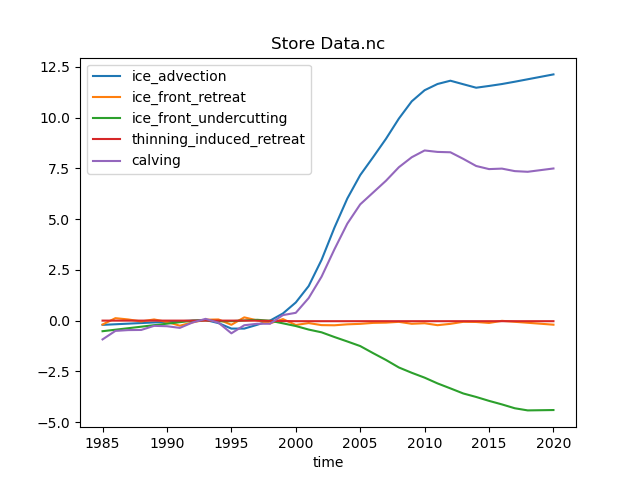

In [197]:
importlib.reload(d_w21)
data_fname = 'Store Data.nc'
df = d_w21.glacier_cumulative_df(data_fname)

# Convert to rates [km a-1]
cols = dict([(cname, df[cname].diff()) for cname in df.columns])
dfr = pd.DataFrame.from_dict(cols)

# compute sigma/sigma_max
#sigma_pct = 1. - (dfr['ice_advection'] - dfr['calving']) / dfr['ice_advection']

#dfr['advdiff'] = dfr['ice_advection'] - dfr['calving']

dfr['sigma_pct'] = np.log(sigma_pct)
#dfr[['sigma_pct']].plot()
#dfr[['advdiff', 'ice_advection']].plot(markersize=120)
#dfr.plot()
df.plot()

#sigma_pct.plot()
plt.title(data_fname)
plt.show()

<IPython.core.display.Javascript object>


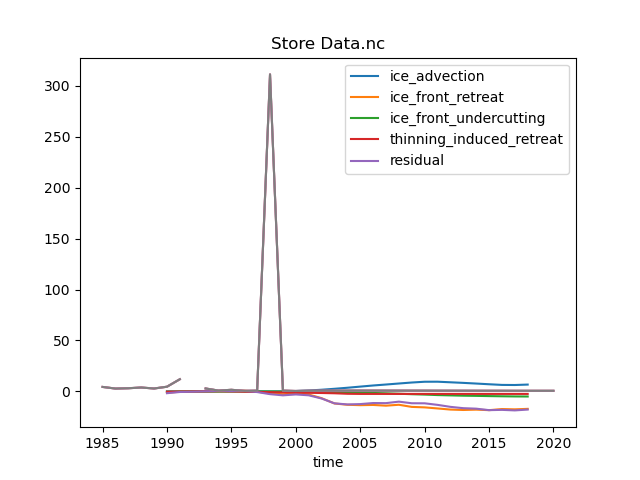

,ice_advection,ice_front_retreat,ice_front_undercutting,thinning_induced_retreat,residual
time,,,,,
1990.0,-0.021244,-1.236656,-0.254299,-0.230872,-1.743070
1991.0,-0.010622,-0.303652,-0.129704,-0.115436,-0.559414
1992.0,0.000000,-0.284133,-0.005110,0.000000,-0.289243
1993.0,0.010622,0.007401,-0.029650,0.123533,0.111906
1994.0,0.087613,0.235227,-0.053046,0.217293,0.487087
1995.0,0.105615,0.269853,0.033350,0.014010,0.422827
1996.0,0.060156,0.671914,0.030387,-0.241830,0.520628
1997.0,0.017291,-0.216961,0.058857,-0.489608,-0.630422
1998.0,-0.000019,-1.959625,-0.011707,-0.706153,-2.677505


In [151]:
importlib.reload(d_w21)
import scipy.interpolate

# https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-numpy-scipy
def moving_average(x, w):
    """w:
        Width of moving average (integer number of points).
        Assumes equispaced data."""
    return np.convolve(x, np.ones(w), 'valid') / w


# Times we will interpolate to


qnames = (
        ('ice_advection',1), ('ice_front_retreat',-1), ('ice_front_undercutting',-1),
        ('thinning_induced_retreat',-1))

# Read the data
data = dict()
with d_w21.open_data(data_fname) as nc:
    for qname,sign in qnames:
        time = d_w21.data_var(nc, qname, 'cumulative', 'time')[:].data
        value = d_w21.data_var(nc, qname, 'cumulative', 'value')[:].data

        data[qname] = {'qname': qname, 'w21_data_fname':data_fname, 'time':time, 'value':value*sign}

# Average by year
for qname in ('ice_front_retreat',):
    row = data[qname]

    df = pd.DataFrame(columns=('time', 'value'), data={'time':row['time'], 'value':row['value']})
    df['iyear'] = (df['time'] - .5).apply(np.floor)
    df = df.groupby(['iyear']).mean()
    row['time'] = df.index.to_list()
    row['value'] = df.value.to_list()
    
# Interpolate to 1x/year
time2 = np.linspace(year0, year1, int(.5+1+(year1-year0)/1.))
cols = {'time': time2}
for qname,row in data.items():
    F = scipy.interpolate.interp1d(row['time'], row['value'], fill_value='extrapolate')
    year0 = 1990.
    year1 = 2018.
    cols[qname] = F(time2)

# Turn into a single dataframe
df = pd.DataFrame.from_dict(cols)
df = df.set_index('time')

# Calving is the residual of advection, frontal retreat, front undercutting and thinning-induced retreat
df['residual'] = df.sum(axis=1)
    
df.plot(y=df.columns)
#plt.show()
df


In [136]:

# Plot the data
plt.title(data_fname)
for row in data.values():
#    print(row['df'])
#    line, = row['df'].plot(x='time', y='value')
    df = row['df']
    line, = plt.plot(df.time.values, df.value.values)
    line.set_label(row['qname'])
plt.legend()
plt.show()

        ice_advection  ice_front_retreat  ice_front_undercutting  \
time                                                               
1990.0       0.230872           0.230872                0.230872   
1991.0       0.115436           0.115436                0.115436   
1992.0      -0.000000          -0.000000               -0.000000   
1993.0      -0.123533          -0.123533               -0.123533   
1994.0      -0.217293          -0.217293               -0.217293   
1995.0      -0.014010          -0.014010               -0.014010   
1996.0       0.241830           0.241830                0.241830   
1997.0       0.489608           0.489608                0.489608   
1998.0       0.706153           0.706153                0.706153   
1999.0       0.963369           0.963369                0.963369   
2000.0       1.173227           1.173227                1.173227   
2001.0       1.356242           1.356242                1.356242   
2002.0       1.541523           1.541523        

<IPython.core.display.Javascript object>

KeyError: 'df'

In [157]:
df['diff'] = df.residual.diff()
df[['residual','diff']]

,residual,diff
time,,
1990.0,-1.743070,NaN
1991.0,-0.559414,1.183656
1992.0,-0.289243,0.270171
1993.0,0.111906,0.401149
1994.0,0.487087,0.375182
1995.0,0.422827,-0.064260
1996.0,0.520628,0.097801
1997.0,-0.630422,-1.151050
1998.0,-2.677505,-2.047083


In [70]:
value

array([-0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

<IPython.core.display.Javascript object>


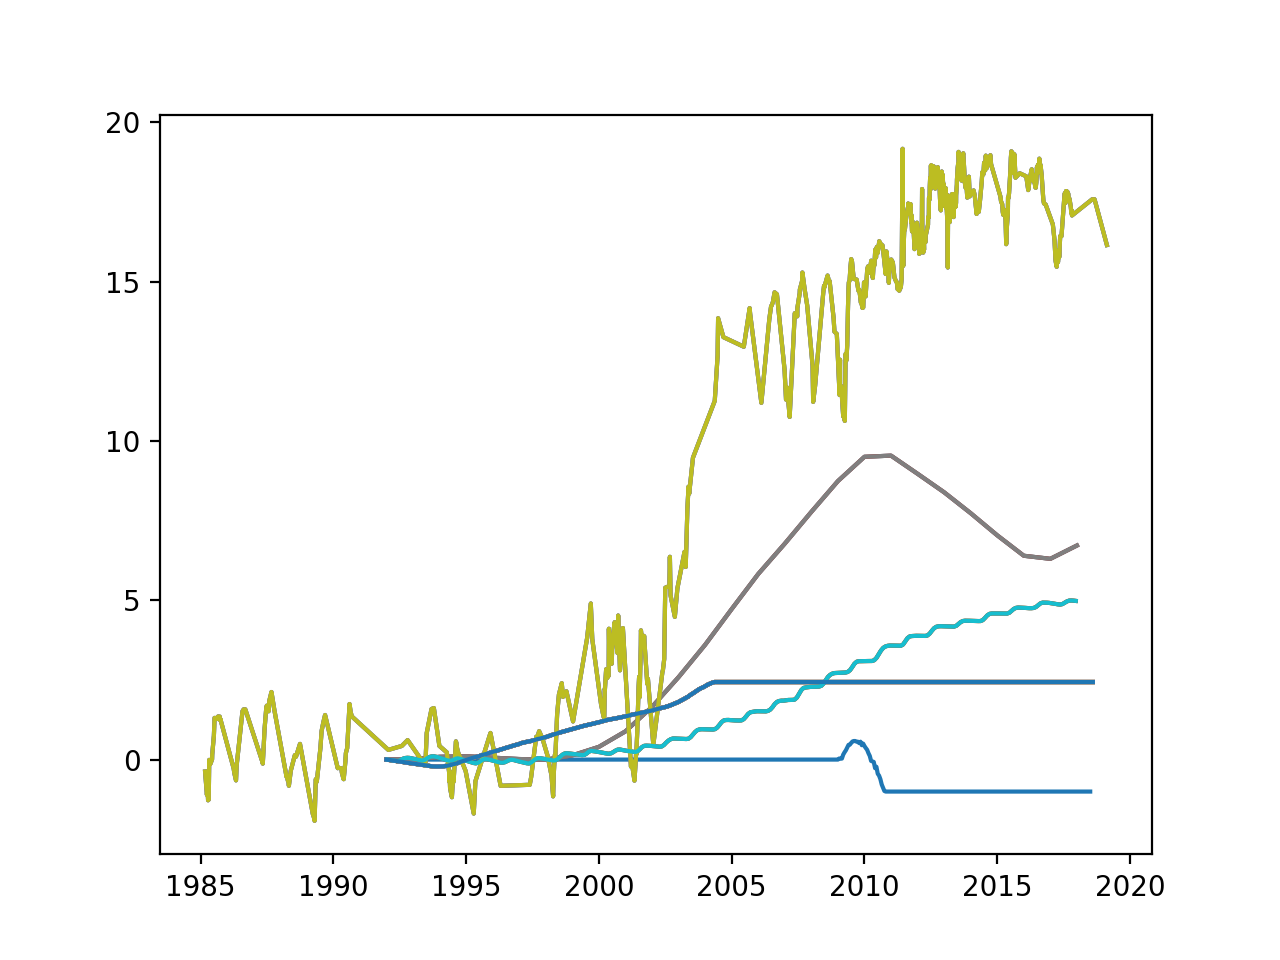

<function matplotlib.pyplot.show(*args, **kw)>

In [71]:
plt.plot(time,value)
plt.show

In [3]:
index = pd.read_pickle(uafgi.data.join('wood2021', 'data', 'index.df'))

In [38]:
index.columns


Index(['data_fname', 'popular_name', 'greenlandic_name', 'coast', 'category',
       'glacier_number', 'glacier_number_no_ncs'],
      dtype='object')

In [37]:
pd.set_option('display.max_rows', index.shape[0]+1)
index

,data_fname,popular_name,greenlandic_name,coast,category,glacier_number,glacier_number_no_ncs
85,Inngia Data.nc,Inngia Isbrae,Salliarutsip Sermia,CW,DW,1,1.0
211,Ummiammakku Data.nc,Umiammakku Isbrae,Umiammakku Sermiat,CW,DW,2,2.0
174,Rink Isbrae Data.nc,Rink Isbrae,Kangilliup Sermia,CW,CR,3,3.0
96,Kangerlussuup Data.nc,Kangerlussuup Se.,Kangerlussuup Sermia,CW,CR,4,4.0
93,Kangerluarsuup Data.nc,Kangerluarsuup Se.,Kangerluarsuup Sermia,CW,SC,5,5.0
160,Perlerfiup Data.nc,Perlerfiup Se.,Perlerfiup Sermia,CW,DW,6,6.0
187,Sermeq Silarleq Data.nc,Sermeq Silarleq,Sermeq Silarleq,CW,DW,7,7.0
101,Kangilleq Data.nc,Kangilleq,Kangilleq,CW,SC,8,8.0
190,Sermilik Data.nc,Sermilik,Sermilik,CW,SC,9,9.0
122,Lille Data.nc,Lille Gl.,Sermeq Avannarleq,CW,DW,10,10.0


In [12]:
w21 = uafgi.data.w21.read(map_wkt)

/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/pandas/core/series.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [14]:
w21.df.columns

Index(['w21_popular_name', 'w21_greenlandic_name', 'w21_coast', 'w21_category',
       'w21_Qr', 'w21_Qf', 'w21_Qm', 'w21_Qs', 'w21_Qc_inferred', 'w21_qm',
       'w21_qf', 'w21_qc', 'w21_mean_depth', 'w21_min_depth',
       'w21_quality_str', 'w21_area_grounded_1992_2017',
       'w21_area_grounded_1992_1997', 'w21_area_grounded_1998_2007',
       'w21_area_grounded_2008_2017', 'w21_mean_fjord_width',
       'w21_length_grounded_1992_2017', 'w21_length_grounded_1992_1997',
       'w21_length_grounded_1998_2007', 'w21_length_grounded_2008_2017',
       'w21_ocean_model_sample_area', 'w21_mean_TF_1992-2017',
       'w21_mean_TF_1992-1997', 'w21_mean_TF_1998-2007',
       'w21_mean_TF_2008-2017', 'w21_subglacial_discharge_1992_2017',
       'w21_subglacial_discharge_1992_1997',
       'w21_subglacial_discharge_1998_2007',
       'w21_subglacial_discharge_2008_2017', 'w21_mean_xsection_area',
       'w21_mean_undercutting_1992_2017', 'w21_mean_undercutting_1992_1997',
       'w21_mean_und

In [15]:
index.columns

Index(['data_fname', 'popular_name', 'greenlandic_name', 'coast', 'category',
       'glacier_number', 'glacier_number_no_ncs'],
      dtype='object')

In [7]:
fname = 'velocities_data/wood2021/data/Kjer N Data.nc'
nc = netCDF4.Dataset(fname)

In [9]:
list(nc.groups.keys())

['along_flow_profile',
 'ice_advection',
 'ice_front_retreat',
 'thermal_forcing',
 'ice_front_undercutting',
 'thinning_induced_retreat',
 'subglacial_discharge']

In [14]:
ucrate = nc.groups['ice_front_undercutting'].groups['rate'].variables['undercutting_rate'][:]

In [16]:
nc.groups['ice_front_undercutting'].groups['rate']

<class 'netCDF4._netCDF4.Group'>
group /ice_front_undercutting/rate:
    dimensions(sizes): undercutting_time(312)
    variables(dimensions): float32 undercutting_rate_time(undercutting_time), float32 undercutting_rate(undercutting_time), float32 undercutting_rate_uncertainty(undercutting_time)
    groups: 

In [17]:
ucrate_time = nc.groups['ice_front_undercutting'].groups['rate'].variables['undercutting_rate_time'][:]
ucrate_time

masked_array(data=[1992.041 , 1992.1257, 1992.205 , 1992.2897, 1992.3716,
                   1992.4563, 1992.5382, 1992.6229, 1992.7076, 1992.7897,
                   1992.8743, 1992.9563, 1993.0411, 1993.126 , 1993.2028,
                   1993.2877, 1993.3699, 1993.4548, 1993.537 , 1993.622 ,
                   1993.7069, 1993.7891, 1993.874 , 1993.9562, 1994.0411,
                   1994.126 , 1994.2028, 1994.2877, 1994.3699, 1994.4548,
                   1994.537 , 1994.622 , 1994.7069, 1994.7891, 1994.874 ,
                   1994.9562, 1995.0411, 1995.126 , 1995.2028, 1995.2877,
                   1995.3699, 1995.4548, 1995.537 , 1995.622 , 1995.7069,
                   1995.7891, 1995.874 , 1995.9562, 1996.041 , 1996.1257,
                   1996.205 , 1996.2897, 1996.3716, 1996.4563, 1996.5382,
                   1996.6229, 1996.7076, 1996.7897, 1996.8743, 1996.9563,
                   1997.0411, 1997.126 , 1997.2028, 1997.2877, 1997.3699,
                   1997.4548, 1997.537

<IPython.core.display.Javascript object>


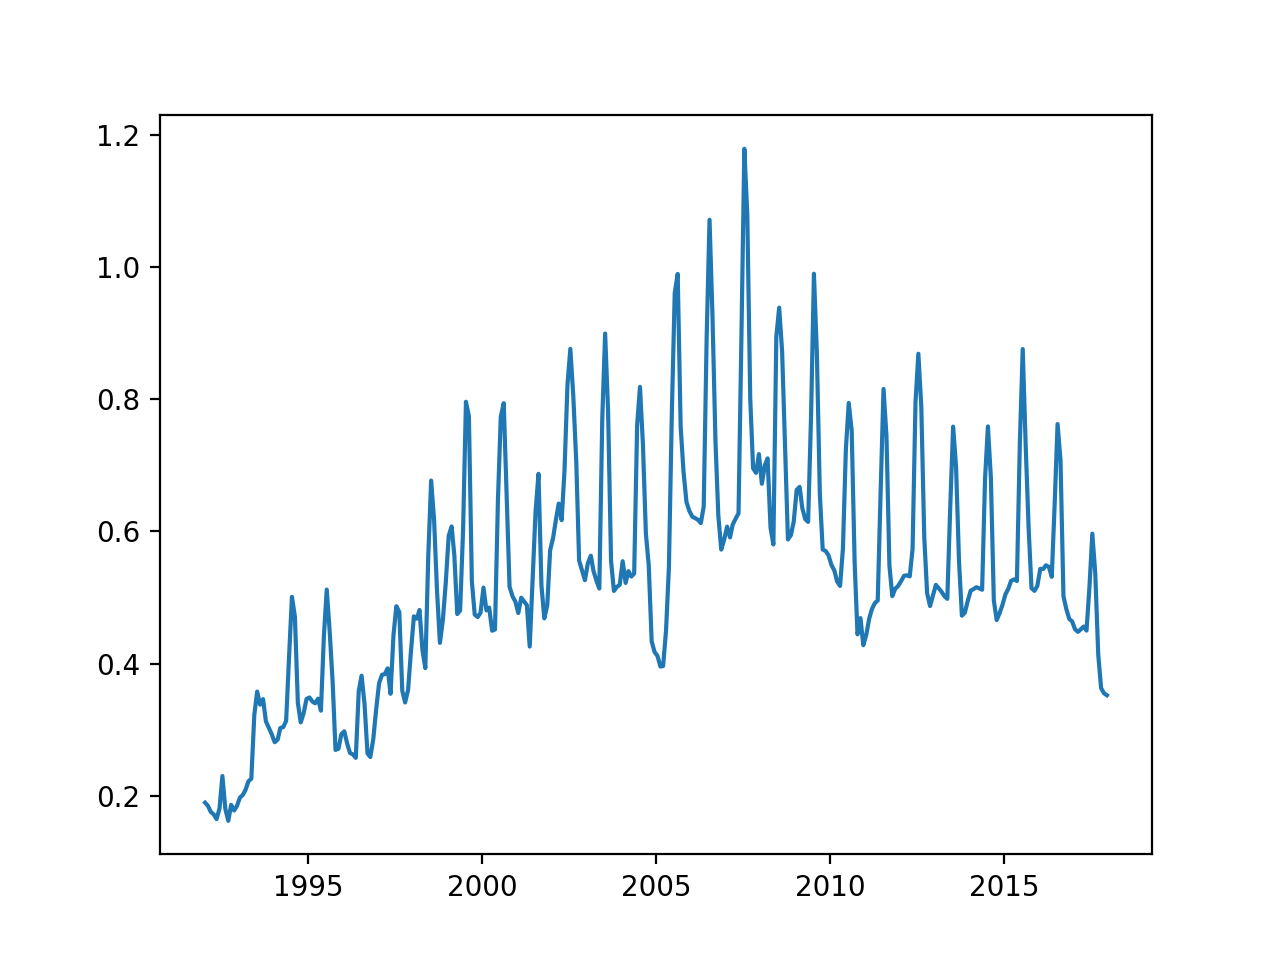

In [22]:
plt.plot(ucrate_time, ucrate)

In [24]:
ucanom = nc.groups['ice_front_undercutting'].groups['cumulative_anomaly'].variables['cumulative_undercutting_anomaly'][:]
ucanom_time = nc.groups['ice_front_undercutting'].groups['cumulative_anomaly'].variables['cumulative_undercutting_anomaly_time'][:]

<IPython.core.display.Javascript object>


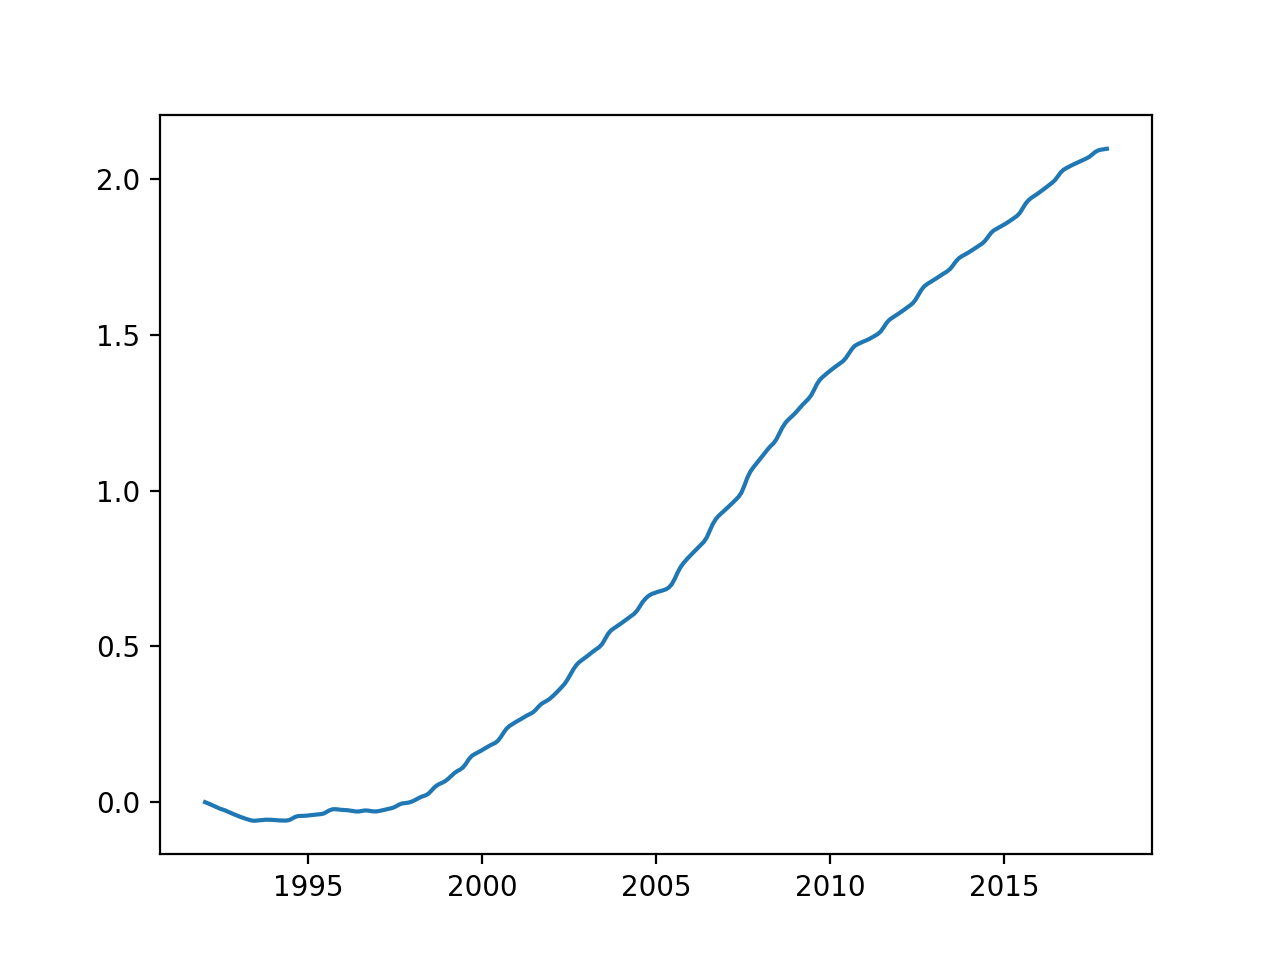

In [29]:
plt.plot(ucanom_time, ucanom)

<IPython.core.display.Javascript object>


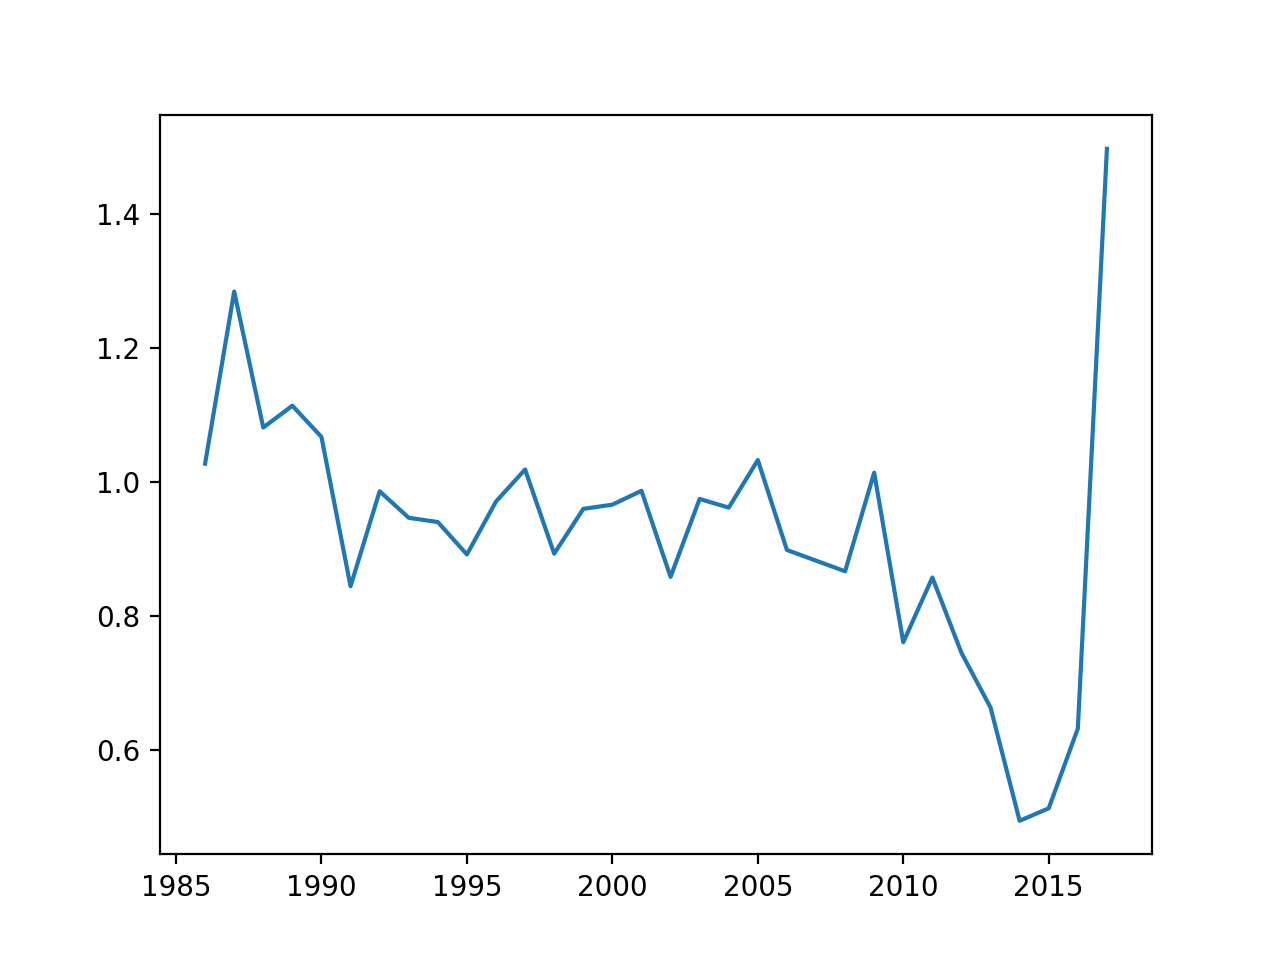

In [30]:
grp0 = nc.groups['ice_advection']
grp1 = grp0.groups['rate']
vname = 'advection_rate'
val = grp1.variables[vname][:]
val_time = grp1.variables[vname+'_time'][:]

plt.plot(val_time,val)

<IPython.core.display.Javascript object>


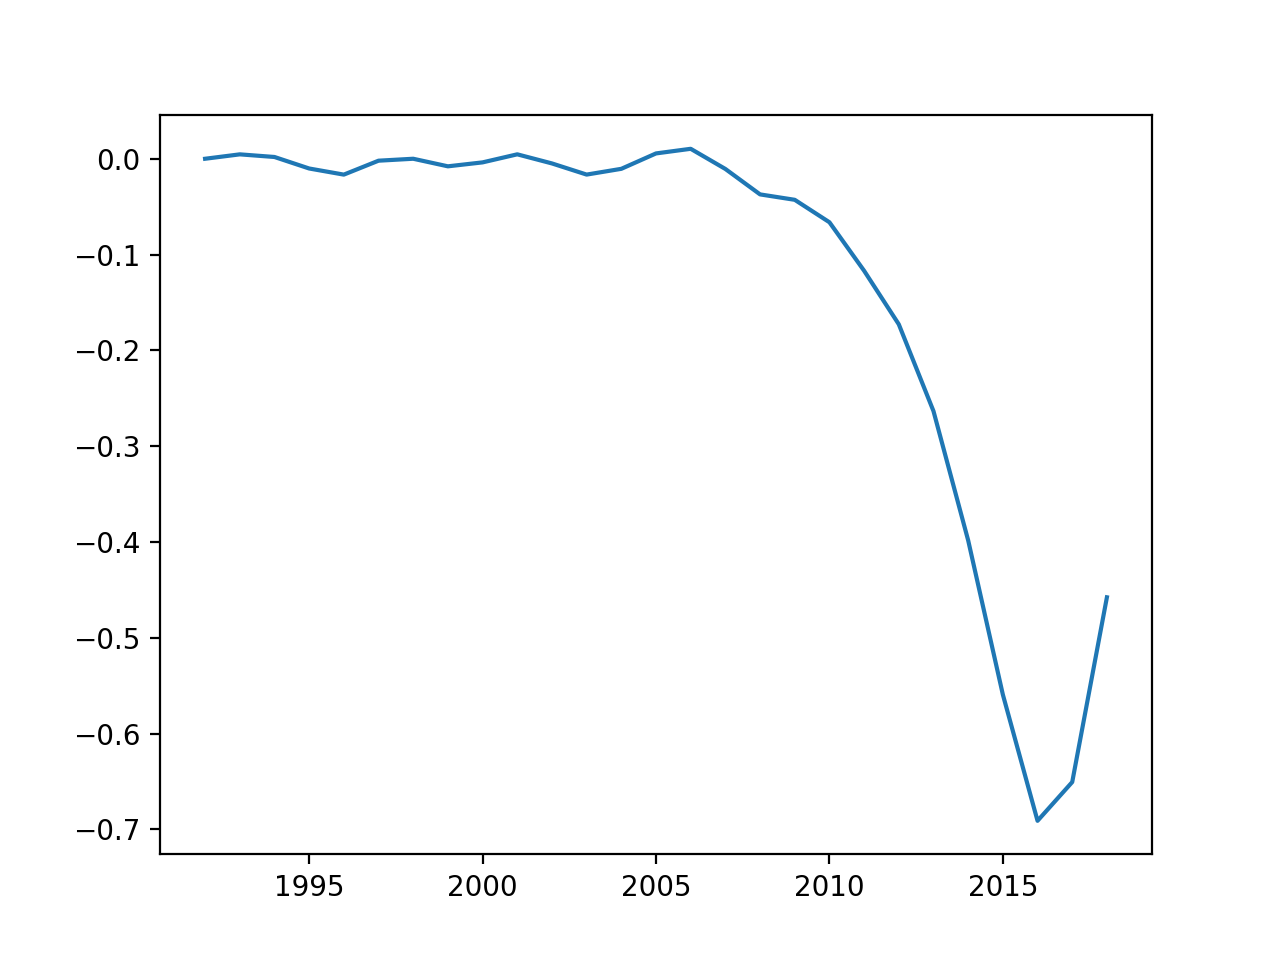

In [33]:
grp0 = nc.groups['ice_advection']
grp1 = grp0.groups['cumulative_anomaly']
vname = 'cumulative_advection_anomaly'
val = grp1.variables[vname][:]
val_time = grp1.variables[vname+'_time'][:]

plt.plot(val_time,val)